Collecting Image

In [10]:
def screen_capture():
    import pyscreenshot as ImageGrab
    import time

    images_folder = "captured_images/9/"

    for i in range(1,101):
        time.sleep(5)
        im = ImageGrab.grab(bbox = (60,170,400,500))
        print("saved",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen and redraw again")

screen_capture()

Generate Data Set

In [23]:
import cv2
import csv
import glob

header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))

with open("dataset.csv","a") as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
        roi = cv2.resize(im_gray,(28,28), interpolation = cv2.INTER_AREA)

        data = []
        data.append(label)
        rows,cols = roi.shape

        ##Add pixel one by one into data Array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]

                if k>100:
                    k=0
                else:
                    k=1
                data.append(k)
        with open("dataset.csv","a") as f:
            writer = csv.writer(f)
            writer.writerow(data)


In [24]:
import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv("dataset.csv")
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
623,6,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
491,4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
615,6,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,8,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
846,8,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
231,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
600,6,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


Separating dependent and independent Variable

In [25]:
X = data.drop(['label'], axis = 1)
Y = data['label']

Preview of one image using matplotlib

6


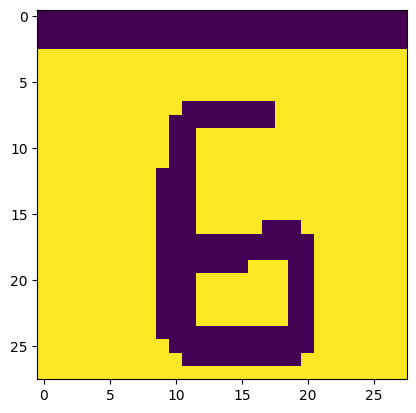

In [27]:
import matplotlib.pyplot as plt
import cv2
idx = 615
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

Train-test split

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2)

Fit the model using SVC and also save the model using jonlib

In [29]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 6)
classifier.fit(train_x, train_y)
joblib.dump(classifier,"model/digit_recognizer")

['model/digit_recognizer']

Calculate Accuracy

In [30]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ", metrics.accuracy_score(prediction, test_y))

Accuracy =  0.955


Live Prediction

In [18]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox = (60,170,400,500))
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")

    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)

    #Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    ##Add pixel value one by one in to data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k = 0
            else:
                k = 1
            X.append(k)

    predictions = model.predict([X])
    print("Prediction: ", predictions[0])
    cv2.putText(im, "Prediction is: "+ str(predictions[0]), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    cv2.waitKey(10000)
    time.sleep(2)
    if cv2.waitKey(1) == 13: ##13 is ASCII value of Enter
        break 
cv2.destroyAllWindows()
    

GUI Handwitten Digit recognition

In [19]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox


Only tkinter Window

In [20]:
window = tk.Tk()
window.title("Handwritten digit recognition")

l1 = tk.Label(window, text = "Digit", font = ('Algerian', 20))
l1.place(x = 5, y = 0)

t1 = tk.Entry(window, width = 20, border = 5)
t1.place(x = 150, y = 7)

b1 = tk.Button(window, text = "1. open paint and capture the screen", font = ('Algerian', 15), bg = "Orange", fg = "Black")
b1.place(x = 5, y = 50)

b2 = tk.Button(window, text = "2. Generate dataset", font = ("Algerian", 15), fg = "blue", bg = "pink")
b2.place(x = 5, y = 100)

b3 = tk.Button(window, text = "3. Train the model, save it and calculate accuracy", font = ("Algerian", 15), fg = "white", bg = "green")
b3.place(x = 5, y = 150)

b4 = tk.Button(window, text = "4. Live Prediction", font = ("Algerian", 15), fg = "red", bg = "white")
b4.place(x = 5, y = 200)

window.geometry("600x300")
window.mainloop()

Final GUI HDR

In [22]:
window = tk.Tk()
window.title("Handwritten digit recognition")

l1 = tk.Label(window, text = "Digit", font = ('Algerian', 20))
l1.place(x = 5, y = 0)

t1 = tk.Entry(window, width = 20, border = 5)
t1.place(x = 150, y = 7)

def screen_capture():
    import pyscreenshot as ImageGrab
    import time
    import os
    
    os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
    s1 = t1.get()
    # os.chdir("C:/Users/DELL/Desktop/Hemanta Programming/Handwritten Digit Recognition/captured_images")
    # os.mkdir(s1)
    # os.chdir("C:/Users/DELL/Desktop/Hemanta Programming/Handwritten Digit Recognition")
    
    images_folder = "captured_images/"+s1+"/"
    time.sleep(15)

    for i in range(101,105):
        time.sleep(5)
        im = ImageGrab.grab(bbox = (60,170,400,500))
        print("saved",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen and redraw again")
    messagebox.showinfo("Result", "Capturing screen is Completed")


b1 = tk.Button(window, text = "1. open paint and capture the screen", font = ('Algerian', 15), bg = "Orange", fg = "Black", command = screen_capture)
b1.place(x = 5, y = 50)


def generate_dataset():
    import cv2
    import csv
    import glob
    
    header = ["label"]
    for i in range(0,784):
        header.append("pixel"+str(i))
    
    with open("dataset.csv","a") as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
    for label in range(10):
        dirList = glob.glob("captured_images/"+str(label)+"/*.png")
        for img_path in dirList:
            im = cv2.imread(img_path)
            im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
            roi = cv2.resize(im_gray,(28,28), interpolation = cv2.INTER_AREA)
    
            data = []
            data.append(label)
            rows,cols = roi.shape
    
            ##Add pixel one by one into data Array
            for i in range(rows):
                for j in range(cols):
                    k = roi[i,j]
    
                    if k>100:
                        k=0
                    else:
                        k=1
                    data.append(k)
            with open("dataset.csv","a") as f:
                writer = csv.writer(f)
                writer.writerow(data)
    messagebox.showinfo("Result", "Genetating dataset is Completed")
    
b2 = tk.Button(window, text = "2. Generate dataset", font = ("Algerian", 15), fg = "blue", bg = "pink", command = generate_dataset)
b2.place(x = 5, y = 100)


def train_save_accuracy():
    import pandas as pd
    from sklearn.utils import shuffle
    
    data = pd.read_csv("dataset.csv")
    data = shuffle(data)

    X = data.drop(['label'], axis = 1)
    Y = data['label']

    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2)

    import joblib
    from sklearn.svm import SVC
    classifier = SVC(kernel = "linear", random_state = 6)
    classifier.fit(train_x, train_y)
    joblib.dump(classifier,"model/digit_recognizer")

    from sklearn import metrics
    prediction = classifier.predict(test_x)
    acc = metrics.accuracy_score(prediction, test_y)
    messagebox.showinfo("Result", f"Your Accuracy is {acc}")
        
b3 = tk.Button(window, text = "3. Train the model, save it and calculate accuracy", font = ("Algerian", 15), fg = "white", bg = "green", command = train_save_accuracy)
b3.place(x = 5, y = 150)

def prediction():
    import joblib
    import cv2
    import numpy as np
    import time
    import pyscreenshot as ImageGrab
    import os
    os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
    
    model = joblib.load("model/digit_recognizer")
    images_folder = "img/"

    time.sleep(15)
    while True:
        img = ImageGrab.grab(bbox = (60,170,400,500))
        img.save(images_folder+"img.png")
        im = cv2.imread(images_folder+"img.png")
    
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
    
        #Threshold the image
        ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
        roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)
    
        rows, cols = roi.shape
    
        X = []
    
        ##Add pixel value one by one in to data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k = 0
                else:
                    k = 1
                X.append(k)
    
        predictions = model.predict([X])
        print("Prediction: ", predictions[0])
        cv2.putText(im, "Prediction is: "+ str(predictions[0]), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)
    
        cv2.startWindowThread()
        cv2.namedWindow("Result")
        cv2.imshow("Result", im)
        cv2.waitKey(10000)
        time.sleep(2)
        if cv2.waitKey(1) == 13: ##13 is ASCII value of Enter
            break 
    cv2.destroyAllWindows()
    

b4 = tk.Button(window, text = "4. Live Prediction", font = ("Algerian", 15), fg = "red", bg = "white", command = prediction)
b4.place(x = 5, y = 200)

window.geometry("600x300")
window.mainloop()